<a href="https://colab.research.google.com/github/mo72001/T5/blob/main/Task_(2)_Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objective
* The objective of this exercise is to explore and visualize the Traffic Index dataset to gain insights and understand the patterns in the data.

##Dataset Description

| Column Name | Description | Data Type |
| :---------------- | :------: | ----: |
|   City  |   Name of the city	   | Object |
| Datetime           |   Date and time of the data entry	   | Object |
|  TrafficIndexLive    |  Real-time traffic index	   | Int |
|  Jamscount |  Number of traffic jams	   | Int |
|   JamsDelay  |   Total delay caused by traffic jams (in minutes)	   | Float |
|JamsLength           |   Total length of traffic jams (in kilometers)	   | Float |
|  TrafficIndexWeekAgo    |  Traffic index one week ago	   | Int |
|  TravelTimeHistoric |  Historical average travel time (in minutes)	   | Float |
|   TravelTimeLive  |   Real-time travel time (in minutes)	   | Float |


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [42]:
df = pd.read_csv('Task (2) Dataset.csv')

# Tasks

## 1. Exploratory Data Analysis (EDA)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66639 entries, 0 to 66638
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   City                 66639 non-null  object 
 1   Datetime             66639 non-null  object 
 2   TrafficIndexLive     66639 non-null  int64  
 3   JamsCount            66639 non-null  int64  
 4   JamsDelay            66639 non-null  float64
 5   JamsLength           66639 non-null  float64
 6   TrafficIndexWeekAgo  66639 non-null  int64  
 7   TravelTimeHistoric   62772 non-null  float64
 8   TravelTimeLive       62772 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 4.6+ MB


In [44]:
df.shape

(66639, 9)

In [45]:
df.head()

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
0,Abudhabi,2023-07-07 08:01:30,6,4,15.6,0.7,13,59.611918,54.803617
1,Abudhabi,2023-07-07 09:01:30,7,7,20.5,1.7,8,60.221387,56.118629
2,Abudhabi,2023-07-07 10:46:30,7,8,25.0,2.8,6,59.161978,55.518834
3,Abudhabi,2023-07-07 11:16:30,8,11,30.6,5.5,6,59.738138,56.413917
4,Abudhabi,2023-07-07 12:01:30,8,20,62.1,6.5,5,58.958314,56.059246


In [46]:
df.tail()

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
66634,Riyadh,2023-12-15 03:01:30,8,33,127.8,20.4,8,63.926569,63.245473
66635,Riyadh,2023-12-15 04:31:30,6,27,87.0,13.8,5,59.182641,60.012955
66636,Riyadh,2023-12-15 05:01:30,3,17,49.8,6.7,1,57.746816,57.561438
66637,Riyadh,2023-12-15 06:01:30,0,16,61.3,4.3,0,56.535277,55.463218
66638,Riyadh,2023-12-15 07:01:30,0,15,39.5,5.2,0,56.126417,54.886055


### Perform summary statistics on the dataset.

In [47]:
df.describe()

,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
count,66639.000000,66639.000000,66639.000000,66639.000000,66639.000000,62772.000000,62772.000000
mean,14.043113,74.278531,288.353877,49.316135,13.981737,70.706601,70.048451
std,13.488906,107.452022,470.013224,85.352525,13.454922,10.588384,11.966725
min,0.000000,0.000000,0.000000,0.000000,0.000000,49.381346,46.723235
25%,3.000000,9.000000,27.700000,3.000000,3.000000,63.142591,60.712805
50%,10.000000,29.000000,95.700000,12.200000,10.000000,68.894790,68.247303
75%,21.000000,95.000000,336.600000,53.500000,21.000000,76.250975,77.043739
max,138.000000,1359.000000,9989.400000,1173.900000,138.000000,120.140593,134.484139


In [48]:
df['City'].value_counts()

City
Doha        8692
Riyadh      8692
Kuwait      8691
Cairo       8690
Dubai       8690
Abudhabi    3864
Al-ain      3864
Dammam      3864
Jeddah      3864
Mecca       3864
Medina      3864
Name: count, dtype: int64

In [49]:
df['Datetime'].value_counts()

Datetime
2023-10-07 01:01:30    11
2023-11-03 02:01:30    11
2023-08-07 23:01:30    11
2023-08-08 00:01:30    11
2023-08-08 02:01:30    11
                       ..
2023-04-04 06:46:30     1
2023-04-04 14:31:30     1
2023-04-04 18:46:30     1
2023-04-05 06:16:30     1
2023-12-14 20:16:00     1
Name: count, Length: 22242, dtype: int64

In [51]:
dt_obj = dt.datetime.strptime(df['Datetime'].values[0], '%Y-%m-%d %H:%M:%S') # Changed the expected format to match the data

# Now you can use strftime
dt.datetime.strftime(dt_obj, '%Y-%m')
df['Datetime'] = pd.to_datetime(df['Datetime']) # Removed format since the to_datetime function can now automatically infer it
df['Datetime'] = df['Datetime'].dt.strftime('%Y-%m')
print(df['Datetime'])

0        2023-07
1        2023-07
2        2023-07
3        2023-07
4        2023-07
          ...   
66634    2023-12
66635    2023-12
66636    2023-12
66637    2023-12
66638    2023-12
Name: Datetime, Length: 66639, dtype: object


### Identify and analyze patterns in the data.

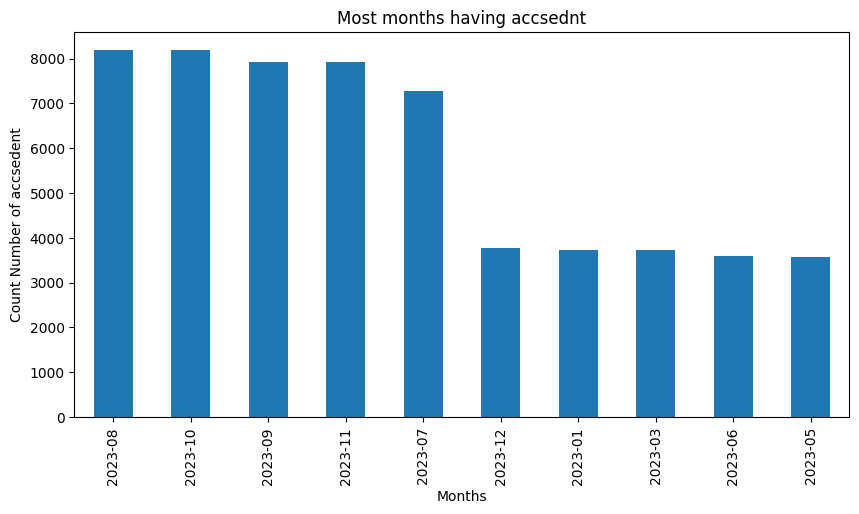

In [52]:
plt.figure(figsize=(10, 5))
df['Datetime'].value_counts().head(10).sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Months')
plt.ylabel('Count Number of accsedent')
plt.title('Most months having accsednt')
plt.show()


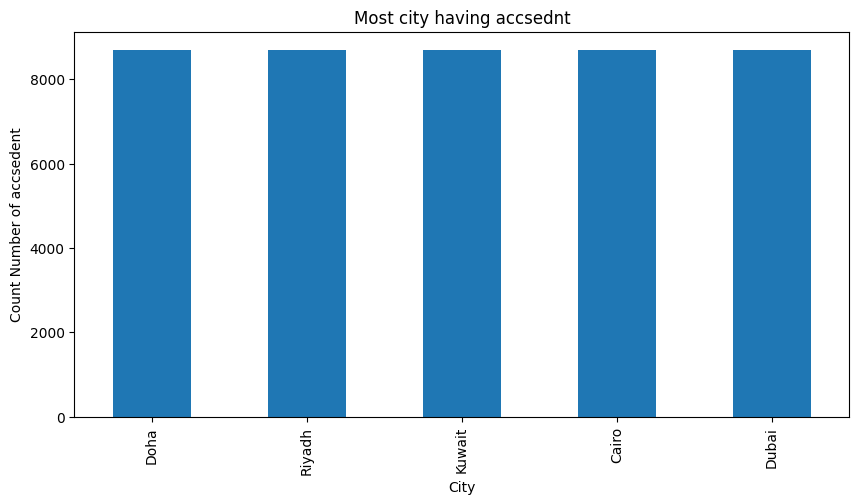

In [55]:
plt.figure(figsize=(10, 5))
df['City'].value_counts().head(5).sort_values(ascending=False).plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Count Number of accsedent')
plt.title('Most city having accsednt')
plt.show()

### Visualize the distribution of key variables (e.g., Traffic_Index, Date).

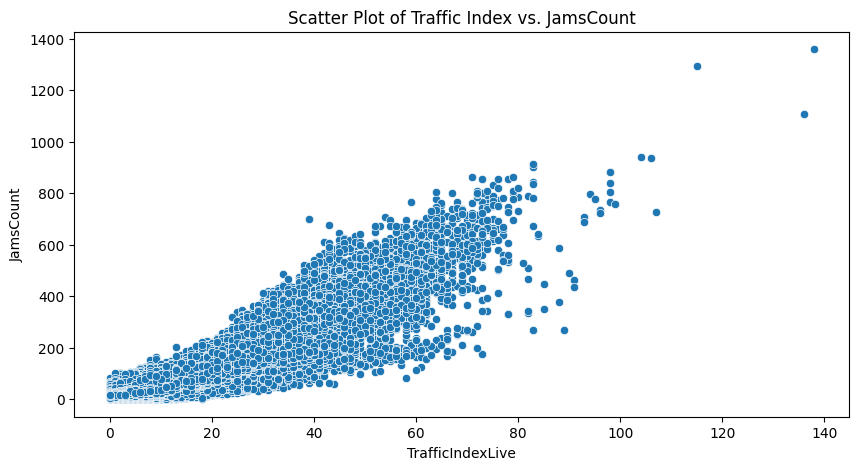

In [58]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='TrafficIndexLive', y='JamsCount', data=df)
plt.title('Scatter Plot of Traffic Index vs. JamsCount')
plt.show()

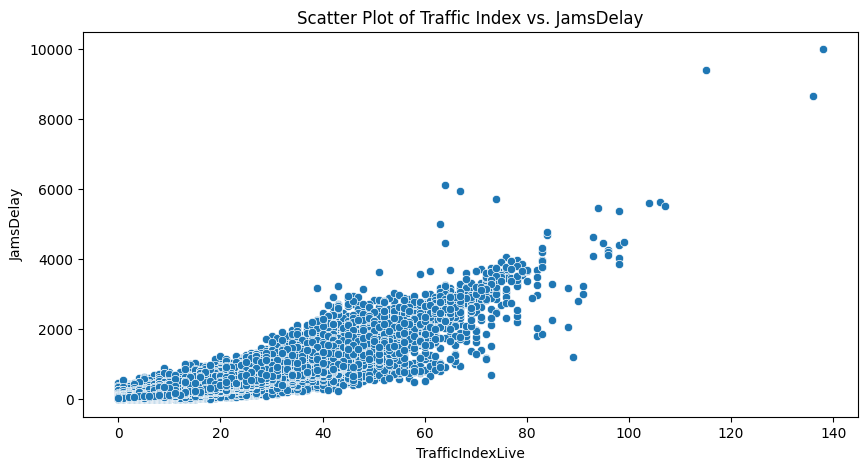

In [59]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='TrafficIndexLive', y='JamsDelay', data=df)
plt.title('Scatter Plot of Traffic Index vs. JamsDelay')
plt.show()

### Explore relationships between variables (e.g., Traffic_Index vs. Weather_Condition).


                     City  Datetime  TrafficIndexLive  JamsCount  JamsDelay  \
City                  NaN       NaN               NaN        NaN        NaN   
Datetime              NaN       NaN               NaN        NaN        NaN   
TrafficIndexLive      NaN       NaN          1.000000   0.876216   0.861349   
JamsCount             NaN       NaN          0.876216   1.000000   0.982459   
JamsDelay             NaN       NaN          0.861349   0.982459   1.000000   
JamsLength            NaN       NaN          0.866799   0.952762   0.962679   
TrafficIndexWeekAgo   NaN       NaN          0.903282   0.806545   0.775028   
TravelTimeHistoric    NaN       NaN          0.331072   0.305166   0.303733   
TravelTimeLive        NaN       NaN          0.642326   0.566874   0.571188   

                     JamsLength  TrafficIndexWeekAgo  TravelTimeHistoric  \
City                        NaN                  NaN                 NaN   
Datetime                    NaN                  NaN     

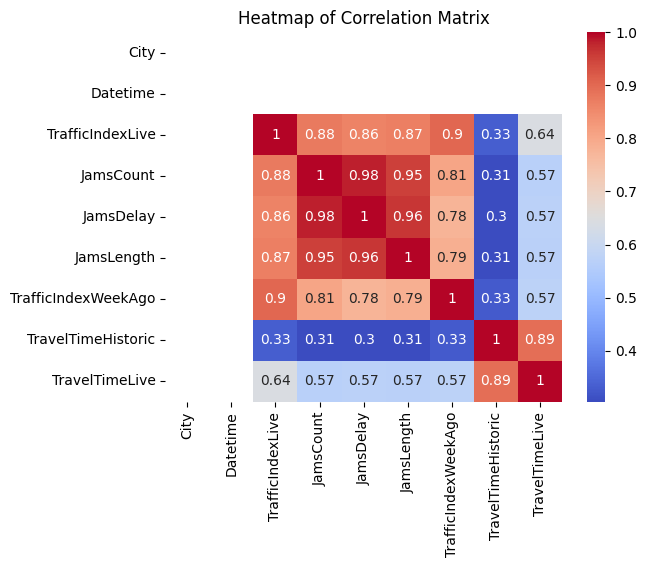

In [39]:
for col in df.columns:
    if df[col].dtype == 'object':  # Check if column is of object (string) type
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, replace non-convertibles with NaN
        except:
            pass
corrletion_matrix = df.corr()
print(corrletion_matrix)
# Create a heatmap to visualize the correlations between variables.
# write your code here
sns.heatmap(corrletion_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

## 2. Data Visualization

* Ensure the visualizations are clear and informative.

### Create visualizations to illustrate the findings from the EDA.


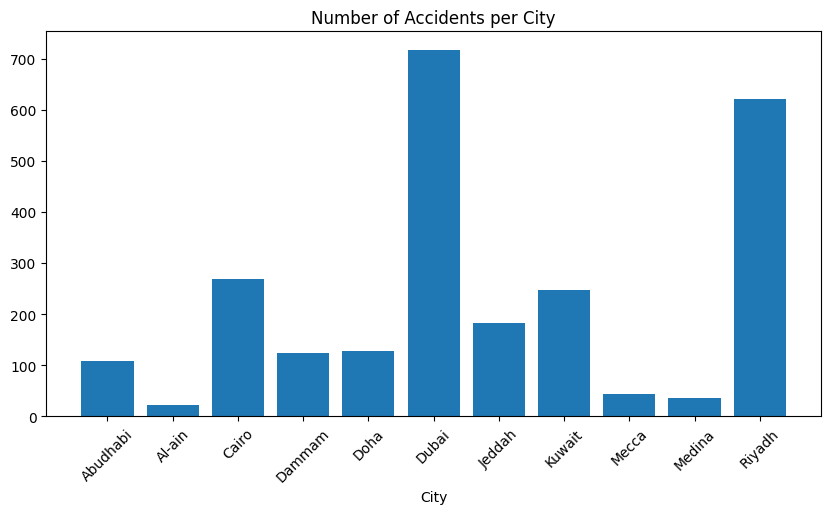

In [78]:
plt.figure(figsize=(10, 5))

accident_counts = df.groupby('City')['JamsDelay'].mean()

plt.bar(accident_counts.index, accident_counts.values)
plt.xlabel('City')
plt.ylabel('Jams Delay')
plt.title('Averge of all city jams delay')
plt.xticks(rotation=45)
plt.show()

### Use appropriate plots such as histograms, bar charts, pie charts, scatter plots, and heatmaps.

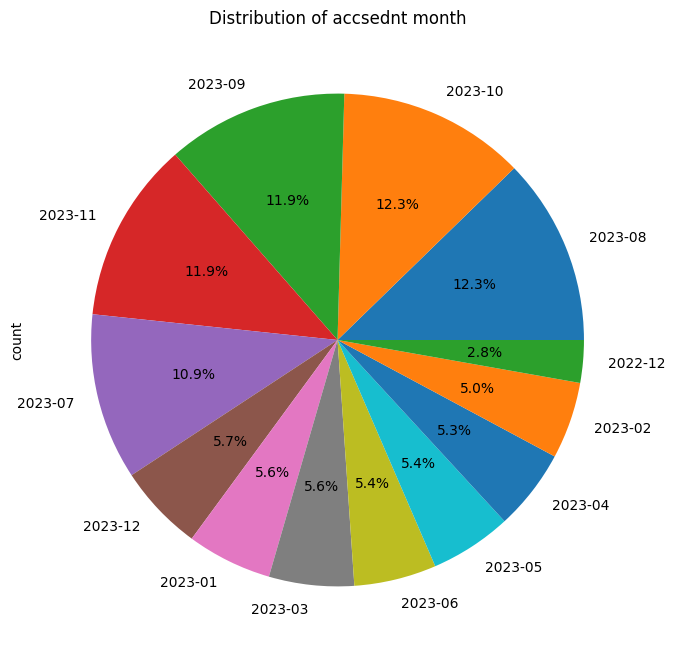

In [56]:

plt.figure(figsize=(10, 8))
df['Datetime'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of accsednt month')
plt.show()

## 3. Insights and Conclusions

* <h3>Summarize the key insights gained from the data analysis.<h3/>
* <h3>Draw conclusions based on the patterns observed in the data.<h3/>

# Conclusion

Here most of accsedent happend in summer vecation month 7 - 11 which seems that time outside these time caused jams traffic and accsednt